In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import os
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits

In [2]:
dataset = pd.read_csv("https://raw.githubusercontent.com/jaffotsa/sml/main/Sesi%C3%B3n%2004.%20Regresiones/Ejercicio02/kc_house_data.csv")
dataset.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
# 2. cargue el csv proporcionado para la clase
# del día de hoy y explore brevemente los datos

dataset.head()


dataset.describe()

print(dataset.columns) # ver los nombres de las variables

space=dataset['sqft_living']
price=dataset['price']

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

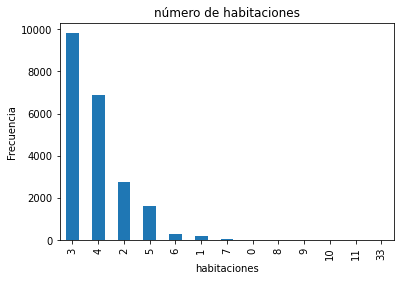

In [4]:
# EDA de distintas variables

# Barplot habitaicones
dataset['bedrooms'].value_counts().plot(kind='bar')
plt.title('número de habitaciones')
plt.xlabel('habitaciones')
plt.ylabel('Frecuencia')
sns.despine

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 720x720 with 0 Axes>

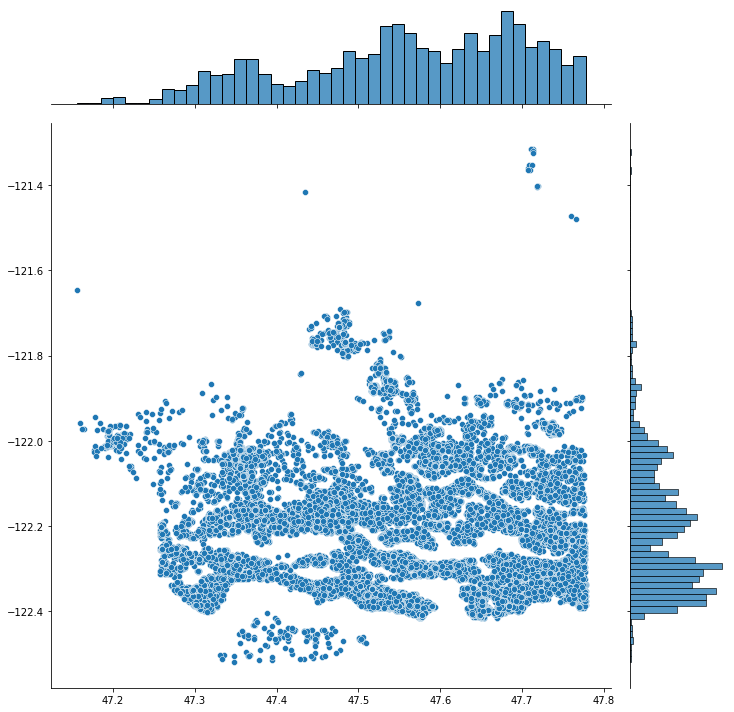

TypeError: ignored

In [ ]:
# De dispersión de localización

plt.figure(figsize=(10,10))
sns.jointplot(x=dataset.lat.values, y=dataset.long.values, size=10)
plt.ylabel('Longitud', fontsize=12)
plt.xlabel('Latitud', fontsize=12)
plt.show()
plt1 = plt()
sns.despine

Text(0.5, 1.0, 'Precio vs Pies cuadrados')

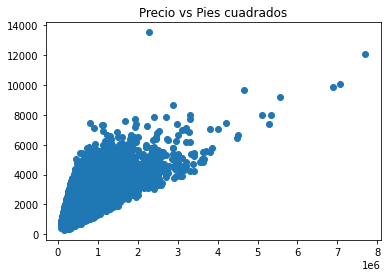

In [ ]:
# De dispersión del precio contra pies cuadrados construidos

plt.scatter(dataset.price, dataset.sqft_living)
plt.title("Precio vs Pies cuadrados")

Text(0.5, 1.0, 'Precio vs Localización')

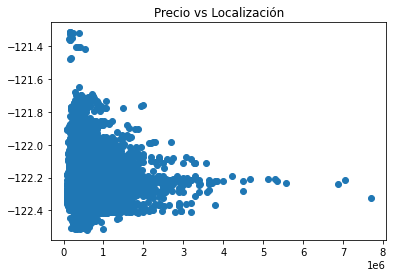

In [ ]:
# De Precio contra localización

plt.scatter(dataset.price,dataset.long)
plt.title("Precio vs Localización")


In [5]:
labels = dataset['price']
conv_dates = [1 if values == 2014 else 0 for values in dataset.date]
dataset['date'] = conv_dates
train1 = dataset.drop(['id', 'price'],axis=1)

In [6]:
print(dataset.date)

print(train1.columns)

train1.describe()

labels.head(10)

0        0
1        0
2        0
3        0
4        0
        ..
21608    0
21609    0
21610    0
21611    0
21612    0
Name: date, Length: 21613, dtype: int64
Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


0     221900.0
1     538000.0
2     180000.0
3     604000.0
4     510000.0
5    1225000.0
6     257500.0
7     291850.0
8     229500.0
9     323000.0
Name: price, dtype: float64

In [7]:
# 4. Use regresiones para desarrollar su modelo de regresión múltiple,
# y haga fit en el las dos variables que creo en el paso anterior

from sklearn.model_selection import train_test_split

In [8]:
# Spliting con Scki-kit Leatn

x_train , x_test , y_train , y_test = train_test_split(train1 , labels , test_size = 0.10,random_state =2)


In [9]:
# Hagamos fit en la regresion

regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [10]:
# Veamos la R^2
regressor.score(x_test,y_test)

0.7320342760357724